Please visit [this colab link](!https://colab.research.google.com/drive/1Nzn0sxoF7gPyPojQ0H47_r2dtzV1Laq3?usp=sharing) to run this notebook in google colab.

When running the notebook in colab, you will have upload the following into the runtime:

- kaggle.json
- datasets.py
- losses.py
- model.py
- trainer.py



## Data Download

In [1]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [3]:
# prompt: prepare the kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# prompt: https://www.kaggle.com/datasets/arnavjain1/glaucoma-datasets, download this dataset, put it in a data directory and unzip it

!kaggle datasets download -d arnavjain1/glaucoma-datasets -p /content/data
!unzip /content/data/glaucoma-datasets.zip -d /content/data


# Binary Segmentation Training

This notebook demonstrates the usage of the `Trainer` on a binary segmentation problem.

The dataset that will be used is the Glaucoma dataset from kaggle, this dataset comprises fundus images and masks from 3 separate datasets. For the purpose of this demonstration, the G1020 dataset will be used.

Source: https://www.kaggle.com/datasets/arnavjain1/glaucoma-datasets?select=G1020

The model that will be utilized is a U-Net based model that uses the VGG network as its encoder.

## Loading the Data

In order to use the `Trainer`, a PyTorch `DataLoader` is required, this in turn requires a PyTorch Data pipeline. To facilitate this, the BinarySegmentationDataset ([available here](!)) will be used.

In [1]:
import torch
import matplotlib.pyplot as plt
import cv2
from torch.utils.data import DataLoader
from model import VGGUNet
from losses import DiceBCELoss
from datasets import BinarySegmentationDataset
from trainer import Trainer

In [2]:
images_dir = "./data/G1020/Images_Square/"
masks_dir = "./data/G1020/Masks_Square/"

In [3]:
# prompt: define a set of transforms to resize the data to 224,224
import torchvision
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor()
])

mask_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224), interpolation=transforms.InterpolationMode.NEAREST),
    transforms.PILToTensor()
])


In [4]:
bin_dataset = BinarySegmentationDataset(images_dir, masks_dir, transform, mask_transform)
bin_dl = DataLoader(bin_dataset, 16, shuffle=True, pin_memory=True)

In [5]:
x, y = next(iter(bin_dl))

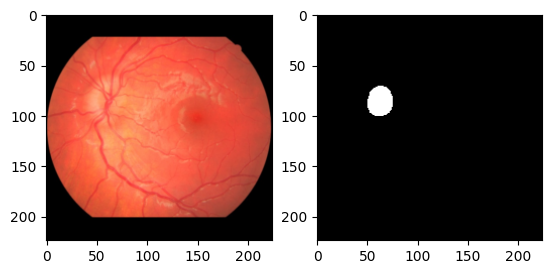

In [6]:
fig, ax = plt.subplots(1, 2)
img = x[0].numpy().transpose(1, 2, 0)
ax[0].imshow(img)
ax[1].imshow(torch.squeeze(y[0], dim=0), cmap='gray')

## Training

Using the trainer is quite easy, and it only requires a few essential input requirements:

- A model
- An optimizer
- A loss function

Additionally, the number of classes and epochs should also be passed in.

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [8]:
model = VGGUNet(1, simple=True).to(device)
opt = torch.optim.Adam(model.parameters())
loss = DiceBCELoss()

In [9]:
trainer = Trainer(model, bin_dl, 1, 10, loss, opt)

Starting training is quite easy and has been designed to mimic Keras' `.fit` functionality. If validation is not being used, the method can simple be called without any arguments.

If validation is required you will have to pass in a validation dataloader as well as the validation flag.

Starting epoch : 1 -------------------------------------------------------------------


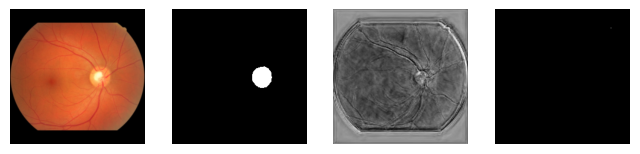

The loss on the first batch is : 1.9024165868759155
Loss at epoch : 1 : 1.737
Epoch : 1 took 0 mins : 43 seconds


------------------------------------------------------------------------------------------






Starting epoch : 2 -------------------------------------------------------------------


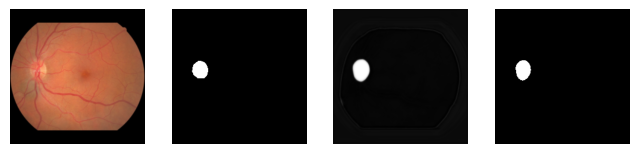

The loss on the first batch is : 1.6806859970092773
Loss at epoch : 2 : 1.669
Epoch : 2 took 0 mins : 39 seconds


------------------------------------------------------------------------------------------






Starting epoch : 3 -------------------------------------------------------------------


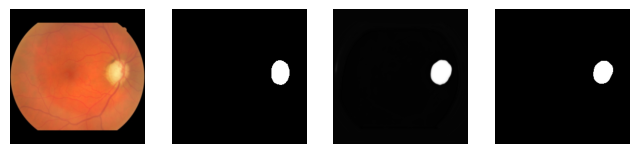

The loss on the first batch is : 1.658813238143921
Loss at epoch : 3 : 1.655
Epoch : 3 took 0 mins : 39 seconds


------------------------------------------------------------------------------------------






Starting epoch : 4 -------------------------------------------------------------------


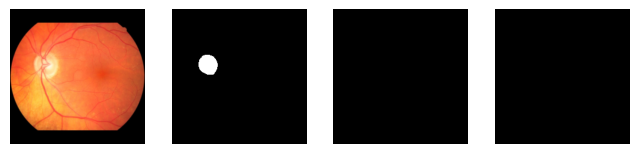

The loss on the first batch is : 1.6542389392852783
Loss at epoch : 4 : 1.651
Epoch : 4 took 0 mins : 40 seconds


------------------------------------------------------------------------------------------






Starting epoch : 5 -------------------------------------------------------------------


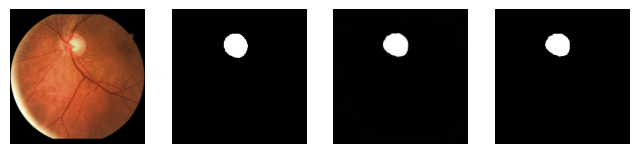

The loss on the first batch is : 1.6512234210968018
Loss at epoch : 5 : 1.648
Epoch : 5 took 0 mins : 40 seconds


------------------------------------------------------------------------------------------






Starting epoch : 6 -------------------------------------------------------------------


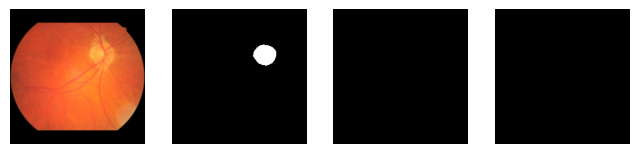

The loss on the first batch is : 1.651505470275879
Loss at epoch : 6 : 1.647
Epoch : 6 took 0 mins : 39 seconds


------------------------------------------------------------------------------------------






Starting epoch : 7 -------------------------------------------------------------------


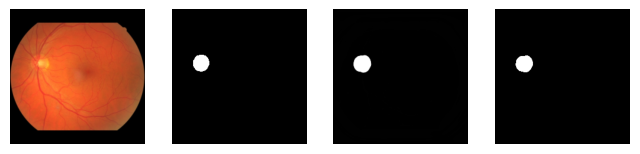

The loss on the first batch is : 1.6448837518692017
Loss at epoch : 7 : 1.647
Epoch : 7 took 0 mins : 39 seconds


------------------------------------------------------------------------------------------






Starting epoch : 8 -------------------------------------------------------------------


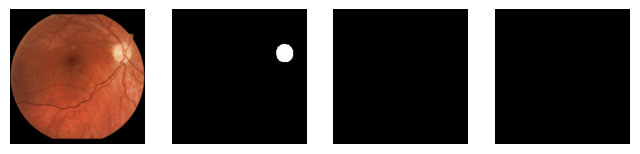

The loss on the first batch is : 1.6494483947753906
Loss at epoch : 8 : 1.646
Epoch : 8 took 0 mins : 39 seconds


------------------------------------------------------------------------------------------






Starting epoch : 9 -------------------------------------------------------------------


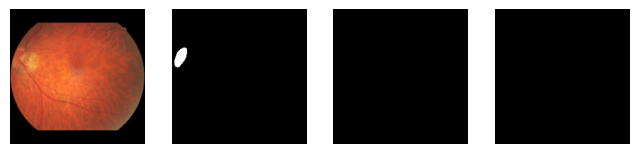

The loss on the first batch is : 1.6471505165100098
Loss at epoch : 9 : 1.646
Epoch : 9 took 0 mins : 39 seconds


------------------------------------------------------------------------------------------






Starting epoch : 10 -------------------------------------------------------------------


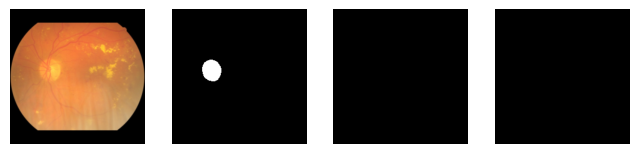

The loss on the first batch is : 1.6429102420806885
Loss at epoch : 10 : 1.645
Epoch : 10 took 0 mins : 39 seconds


------------------------------------------------------------------------------------------








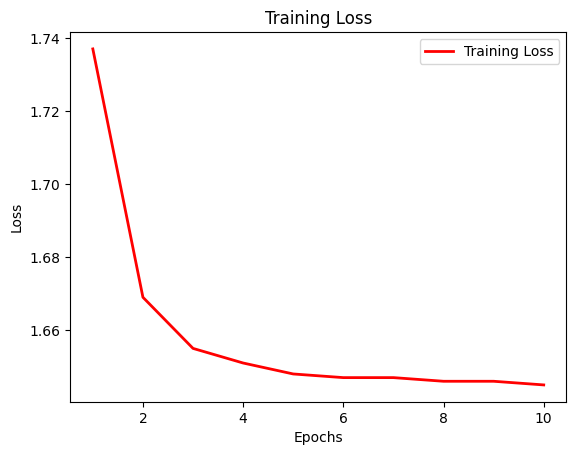

In [10]:
trainer.fit()

In [11]:
# prompt: save the model state dict

torch.save(model.state_dict(), '/content/drive/MyDrive/bin_model_state_dict.pt')
